# Mapping users to movies

Example obtained from [Stanford Dimensionality Reduction](http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf)

Given the following data matrix, $X$, 

<img src="../img/simple_dataset.png" height="300" width="300" align='center'>

Each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. Unsubmitted movie ratings are marked by a zero. On first inspection, we see that the movies are either **sci-fi** or **romance**
The individual movies that we start with can be considered to be 5 different dimensions themselves, but if we group them into two genres (sci-fi or romance), it becomes a compressed representation of our data.

Can we gain a compressed representation of our data matrix to highlight this distinction in our data?

### Importing necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [2]:
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])
m,n = X.shape # m = no of users, n = no of movies

Plotting our dataset

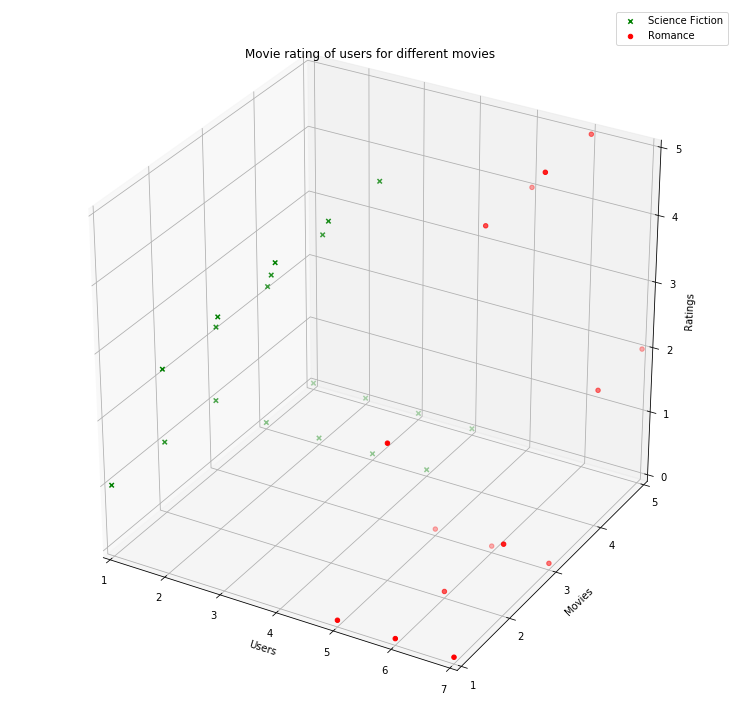

In [3]:
users, movies, reviews = np.array([i+1 for i in range(m)]), np.array([i+1 for i in range(n)]), X.flatten()

def plot_3d_dataset(users, movies, reviews, n: int):
    fig = plt.figure(figsize=(13,13))
    ax = fig.add_subplot(111, projection='3d')

    for idx,user in enumerate(users):
        if idx < 4: # sci fi
            marker = 'x'
            label = 'Science Fiction'
            color = 'green'
        else:       # romance
            marker = 'o'
            label = 'Romance'
            color = 'red'

        ax.scatter(xs=[user for _ in range(n)], 
                   ys=[movie for movie in movies], 
                   zs=[rating for rating in reviews[idx*n:idx*n + n]],
                   marker=marker,
                   color=color,
                   label=label if idx == 0 or idx == 4 else "")

    ax.legend(fontsize=10, loc='upper right')
    ax.set_title('Movie rating of users for different movies')
    ax.set_xlabel('Users')
    ax.set_ylabel('Movies')
    ax.set_zlabel('Ratings')
    
    rmax, rmin = math.ceil(reviews.max()), math.floor(reviews.min())
    ax.set_xlim([users.min(),users.max()])
    ax.set_ylim([movies.min(),movies.max()])
    ax.set_zlim([rmin, rmax])
    
    ax.set_xticks(users)
    ax.set_yticks(movies)
    ax.set_zticks([i for i in range(rmin, rmax+1)])
    
    plt.show(fig)
    
plot_3d_dataset(users, movies, reviews, n)

### Data Preprocessing

Data must be preprocessed and centered around the mean for SVD

In [4]:
X_centered = X - X.mean(axis=0)

**Plotting the centered data**

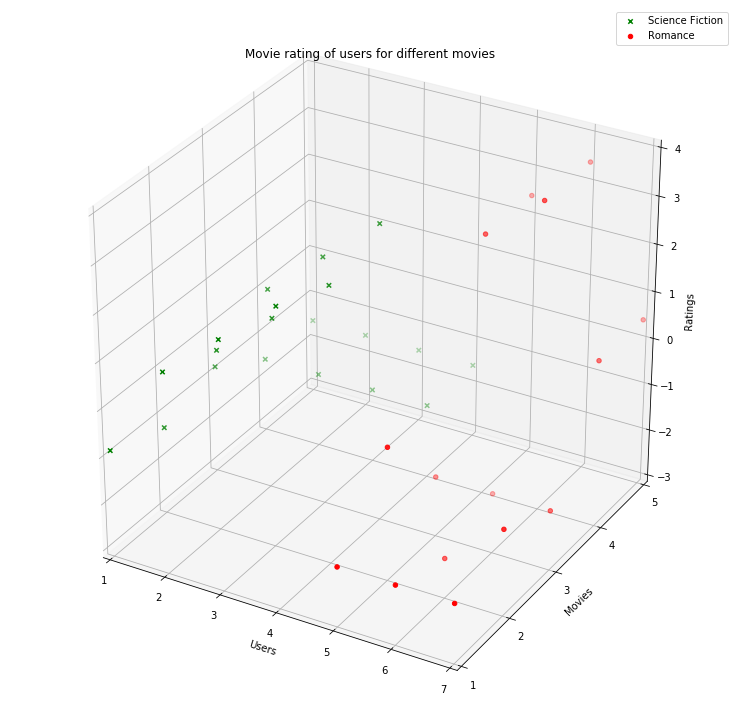

In [5]:
users, movies, reviews = np.array([i+1 for i in range(m)]), np.array([i+1 for i in range(n)]), X_centered.flatten()
plot_3d_dataset(users, movies, reviews, n)

## Solution 1:  PCA with Singular Value Decomposition (SVD)

Linear Algebra states that any matrix can be decomposed into three a matrix product of three matrices:

For any matrix X with dimensions $m x n$

$$ X = USV^T or \> U\Sigma V^T $$

Where the columns of $V$ (rows of $V^T$) are the principal components of X. $U$ and $V$ are orthogonal matrices and $\Sigma$ is a diagonal matrix where the diagonal entries are the _Singular Values_.

$ X^TX=(USV^T)^T(USV^T) = (V^T)^TS^TU^TUSV^T = VS^TU^TUSV^T = VS^2V^T$ ( $U^TU=I$ as $U$ is orthogonal )

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. 

By selecting the first $k$ columns of $V$, we end up selecting the $v_1, v_2, ..., v_k$ vectors.

To project the training matrix $X$ down to $d$ dimensions.
$ X_{d_proj} = XW_d $ where $W_d$ is the matrix containing the first $d$ columns of matrix $V$.

Calculating $U$, $\Sigma$ and $V^T$ matrices

In [6]:
# Use the singular value decomposition from numpy.
u,s,vT = np.linalg.svd(X_centered)

In [7]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")
print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")
print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")
print("V.T =",np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[ 0.014 -0.691 -0.158 -0.703 -0.027  0.025  0.042]
 [ 0.265 -0.142 -0.077  0.196 -0.053  0.929 -0.023]
 [ 0.39   0.133 -0.036 -0.054 -0.453 -0.089  0.783]
 [ 0.516  0.408  0.004 -0.414  0.628  0.039  0.012]
 [-0.388  0.286  0.686 -0.421 -0.169  0.292  0.083]
 [-0.546  0.347 -0.662 -0.185  0.088  0.204  0.244]
 [-0.25  -0.34   0.244  0.286  0.601  0.027  0.564]]

S =
[10.492  4.09   1.324  0.     0.   ]

V.T =
[[ 0.471  0.374  0.471 -0.456 -0.456]
 [ 0.356  0.412  0.356  0.537  0.537]
 [-0.389  0.831 -0.389 -0.061 -0.061]
 [ 0.707 -0.    -0.707 -0.    -0.   ]
 [ 0.     0.    -0.    -0.707  0.707]]



### Plotting the singular values for the Diagonal matrix

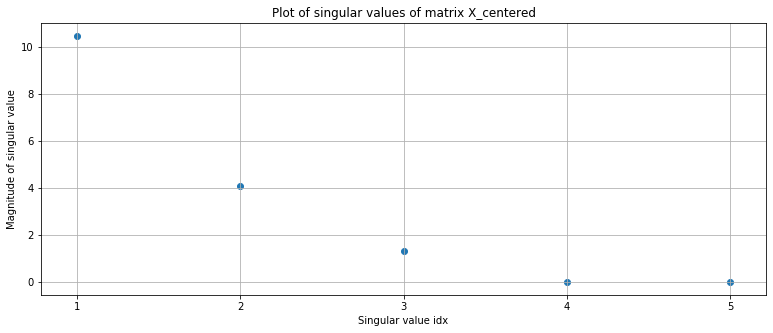

In [8]:
diag_matrix = np.diag(s)

def plot_arr(x_arr, y_arr, 
             title, xlabel, ylabel, 
             figsize=(13,5), ptype='scatter'):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.set_xticks(x_arr)
    ax.grid(True)
    if ptype == 'scatter':
        ax.scatter(x=x_arr, y=y_arr)
    elif ptype == 'bar':
        ax.bar(x=x_arr, height=y_arr)   
    else:
        raise ValueError("Invalid plot type specified. Allowed [scatter] or [bar]")
        
    plt.show(fig)
    
x_arr = [i for i in range(1, len(s)+1)]
plot_arr(x_arr, s, "Plot of singular values of matrix X_centered", 'Singular value idx', 'Magnitude of singular value')

### Determining the number of principal components to use from the scree plot

[65.96429011430871, 25.711053673675483, 8.324656212015798, 2.0098736968224132e-15, 1.6056840589289754e-31]


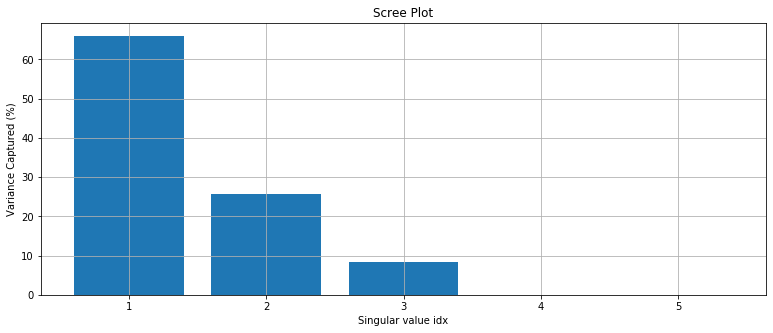

In [9]:
scree_arr = [sing/sum(s) * 100 for sing in s]
print(scree_arr)
x_arr = [i for i in range(1, len(scree_arr)+1)]
plot_arr(x_arr, scree_arr, "Scree Plot", 'Singular value idx', 'Variance Captured (%)', figsize=(13,5), ptype='bar')

From the scree plot above, we can see that using the first and the second principal components captures 66+25= 90% of the variance in our data, so 2 singular values capture a reasonable information from the orginal data so we choose $k$ to be 2 to obtain our compressed data.

In [10]:
k = 2
wd_matrix = vT.T[:, :k]
X_compressed = np.matmul(X_centered, wd_matrix)

### Visualizing our compressed data

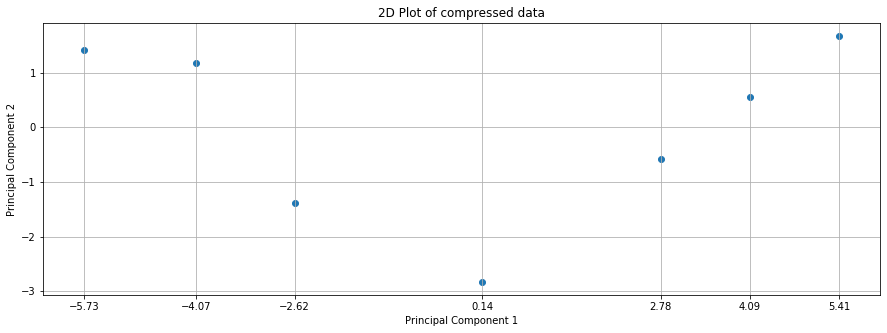

In [14]:
x_arr = X_compressed[:,0]
y_arr = X_compressed[:,1]
plot_arr(x_arr, y_arr, "2D Plot of compressed data", 'Principal Component 1', 'Principal Component 2', figsize=(15,5),ptype='scatter')

## Solution2: Directly computing  V and D 

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [12]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.
# 2. Apply np.linalg.eig() to clculate the eigen vectors and values

In [ ]:
print("V (Eigen-vectors) = ")
print(np.around(, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs()), decimals=3))

Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.
